In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import geopandas as gpd
from shapely.geometry import Point
import altair as alt
import json
import ipywidgets as widgets
from ipywidgets import interact


[notice] A new release of pip is available: 23.0.1 -> 23.3.1
[notice] To update, run: pip install --upgrade pip


In [2]:
csv_file_path = '/Users/myeong-won/Desktop/Final Project/2. Peer/Existing_Buildings_Energy_Performance_Ordinance_Report.csv'
df = pd.read_csv(csv_file_path)
print(df.head())

  unique_identifier Parcel Number            Building Name  \
0     0010/001_2021      0010/001  2801 Leavenworth Street   
1     0010/001_2019      0010/001  2801 Leavenworth Street   
2     0010/001_2017      0010/001  2801 Leavenworth Street   
3     0010/001_2015      0010/001  2801 Leavenworth Street   
4     0010/001_2016      0010/001  2801 Leavenworth Street   

      Building Address  Postal Code  Floor Area Category  \
0  2801 LEAVENWORTH ST        94109      133675   Office   
1  2801 LEAVENWORTH ST        94109      133675   Office   
2  2801 LEAVENWORTH ST        94109      133675   Office   
3  2801 LEAVENWORTH ST        94109      133675   Office   
4  2801 LEAVENWORTH ST        94109      133675   Office   

  Property Type - Self Selected  \
0                    Commercial   
1                    Commercial   
2                    Commercial   
3                    Commercial   
4                    Commercial   

                                            PIM Link  Y

In [3]:
df['Benchmark Year'] = pd.to_datetime(df['Benchmark Year'], format='%Y').dt.year

buildings = df.sort_values(by=['Building Address', 'Benchmark Year'])

In [4]:
buildings

,unique_identifier,Parcel Number,Building Name,Building Address,Postal Code,Floor Area,Category,Property Type - Self Selected,PIM Link,Year Built,...,Site Energy Use (kBtu),Benchmark Status,Reason for Exemption,point,longitude,latitude,analysis_neighborhood,supervisor_district,data_as_of,data_loaded_at
23257,7309/001_2018,7309/001,1 ACEVEDO AVE,1 ACEVEDO AVE,94132,117071,Multifamily Housing,Mixed Residential,https://sfplanninggis.org/PIM/?tab=Property&se...,1942.0,...,NaN,2018 - Violation - Did Not Report,NaN,POINT (-122.483868253 37.719201341),-122.483868,37.719201,Lakeshore,7,10/2/23 11:20,10/10/23 15:44
23258,7309/001_2019,7309/001,1 ACEVEDO AVE,1 ACEVEDO AVE,94132,117071,Multifamily Housing,Mixed Residential,https://sfplanninggis.org/PIM/?tab=Property&se...,1942.0,...,4414745.5,2019 - Complied,NaN,POINT (-122.483868253 37.719201341),-122.483868,37.719201,Lakeshore,7,10/2/23 11:20,10/10/23 15:44
23255,7309/001_2020,7309/001,1 ACEVEDO AVE,1 ACEVEDO AVE,94132,117071,Multifamily Housing,Mixed Residential,https://sfplanninggis.org/PIM/?tab=Property&se...,1942.0,...,4352029.6,2020 - Complied,NaN,POINT (-122.483868253 37.719201341),-122.483868,37.719201,Lakeshore,7,10/2/23 11:20,10/10/23 15:44
23254,7309/001_2021,7309/001,1 ACEVEDO AVE,1 ACEVEDO AVE,94132,117071,Multifamily Housing,Mixed Residential,https://sfplanninggis.org/PIM/?tab=Property&se...,1942.0,...,4908771.5,2021 - Complied,NaN,POINT (-122.483868253 37.719201341),-122.483868,37.719201,Lakeshore,7,10/2/23 11:20,10/10/23 15:44
23256,7309/001_2022,7309/001,1 ACEVEDO AVE,1 ACEVEDO AVE,94132,117071,Multifamily Housing,Mixed Residential,https://sfplanninggis.org/PIM/?tab=Property&se...,1942.0,...,4751891.5,2022 - Complied,NaN,POINT (-122.483868253 37.719201341),-122.483868,37.719201,Lakeshore,7,10/2/23 11:20,10/10/23 15:44
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
23746,9900/015_2018,9900/015,Pier 15,THE EMBARCADERO #0015,94133,217643,Museum,Commercial - Port Facility,https://sfplanninggis.org/PIM/?tab=Property&se...,1900.0,...,NaN,2018 - Violation - Insufficient Data,NaN,POINT (-122.397484144 37.801542134),-122.397484,37.801542,Financial District/South Beach,3,10/2/23 11:20,10/10/23 15:44
23742,9900/015_2019,9900/015,Pier 15,THE EMBARCADERO #0015,94133,217643,Museum,Commercial - Port Facility,https://sfplanninggis.org/PIM/?tab=Property&se...,1900.0,...,2196413.5,2019 - Complied,NaN,POINT (-122.397484144 37.801542134),-122.397484,37.801542,Financial District/South Beach,3,10/2/23 11:20,10/10/23 15:44
23752,9900/015_2020,9900/015,Pier 15,THE EMBARCADERO #0015,94133,217643,Museum,Commercial - Port Facility,https://sfplanninggis.org/PIM/?tab=Property&se...,1900.0,...,-597548.2,2020 - Complied,NaN,POINT (-122.397484144 37.801542134),-122.397484,37.801542,Financial District/South Beach,3,10/2/23 11:20,10/10/23 15:44
23745,9900/015_2021,9900/015,Pier 15,THE EMBARCADERO #0015,94133,217643,Museum,Commercial - Port Facility,https://sfplanninggis.org/PIM/?tab=Property&se...,1900.0,...,-78603.7,2021 - Complied,NaN,POINT (-122.397484144 37.801542134),-122.397484,37.801542,Financial District/South Beach,3,10/2/23 11:20,10/10/23 15:44


In [5]:
buildings_year = buildings[['Benchmark Year', 'ENERGY STAR Score']]


max_energy_star_score_year = buildings.groupby('Benchmark Year')['ENERGY STAR Score'].sum().idxmax()
print("Benchmark Year with the Most ENERGY STAR Scores:", max_energy_star_score_year)

Benchmark Year with the Most ENERGY STAR Scores: 2022


# Insights Derived from the Data Exploration

1. Focus on the year 2022 for in-depth analysis due to its substantial data volume
2. Exclude any records with missing values (NaN values) to maintain data integrity
3. Visualize it on the map based on the postal code
4. Identify the neighborhoods that most frequently correlate with the "Energy Star Score" to determine patterns.
5. Apply appropriate weighting to the dataset where indicated by (----)

In [6]:
buildings_2022 = buildings[buildings['Benchmark Year'] == 2022]
buildings_2022

,unique_identifier,Parcel Number,Building Name,Building Address,Postal Code,Floor Area,Category,Property Type - Self Selected,PIM Link,Year Built,...,Site Energy Use (kBtu),Benchmark Status,Reason for Exemption,point,longitude,latitude,analysis_neighborhood,supervisor_district,data_as_of,data_loaded_at
23256,7309/001_2022,7309/001,1 ACEVEDO AVE,1 ACEVEDO AVE,94132,117071,Multifamily Housing,Mixed Residential,https://sfplanninggis.org/PIM/?tab=Property&se...,1942.0,...,4751891.5,2022 - Complied,NaN,POINT (-122.483868253 37.719201341),-122.483868,37.719201,Lakeshore,7,10/2/23 11:20,10/10/23 15:44
21547,4712/008_2022,4712/008,1 ARDATH CT,1 ARDATH CT,94124,484750,NaN,Mixed Residential,https://sfplanninggis.org/PIM/?tab=Property&se...,1983.0,...,NaN,2022 - Violation - Did Not Report,NaN,POINT (-122.380467578 37.733438825),-122.380468,37.733439,Bayview Hunters Point,10,10/2/23 11:20,10/10/23 15:44
20023,3952/001C_2022,3952/001C,1 ARKANSAS ST,1 ARKANSAS ST,94107,26500,Office,Commercial,https://sfplanninggis.org/PIM/?tab=Property&se...,1922.0,...,894740.3,2022 - Complied,NaN,POINT (-122.398403709 37.765925706),-122.398404,37.765926,Mission Bay,10,10/2/23 11:20,10/10/23 15:44
10129,0796/004_2022,0796/004,Banneker Homes,1 BANNEKER WAY,94102,128285,Multifamily Housing,Mixed Residential,https://sfplanninggis.org/PIM/?tab=Property&se...,1969.0,...,51933.1,2022 - Complied,NaN,POINT (-122.428943747 37.777557139),-122.428944,37.777557,Hayes Valley,5,10/2/23 11:20,10/10/23 15:44
137,0018/001_2022,0018/001,One Beach Street,1 BEACH ST,94133,104424,Office,Commercial,https://sfplanninggis.org/PIM/?tab=Property&se...,1971.0,...,NaN,2022 - Exempt,Vacancy,POINT (-122.409572059 37.807747273),-122.409572,37.807747,North Beach,3,10/2/23 11:20,10/10/23 15:44
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6303,0311/015_2022,0311/015,One Post Street,One Post Street,94104,468562,Office,Commercial,https://sfplanninggis.org/PIM/?tab=Property&se...,1969.0,...,17243826.3,2022 - Complied,NaN,POINT (-122.402574567 37.788778737),-122.402575,37.788779,Financial District/South Beach,3,10/2/23 11:20,10/10/23 15:44
23763,9900/017_2022,9900/017,Pier 17,"Pier 17, Suite 100",94133,103900,Other - Education,Commercial - Port Facility,https://sfplanninggis.org/PIM/?tab=Property&se...,1900.0,...,690444.1,2022 - Complied,NaN,POINT (-122.398131188 37.80215856),-122.398131,37.802159,Financial District/South Beach,3,10/2/23 11:20,10/10/23 15:44
23913,9900/274_2022,9900/274,The Ferry Building,THE EMBARCADERO,94105,274094,Office,Commercial - Port Facility,https://sfplanninggis.org/PIM/?tab=Property&se...,NaN,...,17478446.4,2022 - Complied,NaN,POINT (-122.393755011 37.795938232),-122.393755,37.795938,Financial District/South Beach,3,10/2/23 11:20,10/10/23 15:44
23741,9900/001-B_2022,9900/001-B,"Pier 1, Bay 1",THE EMBARCADERO #0001,94111,151606,Office,Commercial - Port Facility,https://sfplanninggis.org/PIM/?tab=Property&se...,NaN,...,1787341.4,2022 - Complied,NaN,POINT (-122.394137944 37.797421226),-122.394138,37.797421,Financial District/South Beach,3,10/2/23 11:20,10/10/23 15:44


In [7]:
cleaned_scores = buildings_2022['ENERGY STAR Score'].dropna()
buildings_2022 = buildings_2022.dropna(subset=['ENERGY STAR Score'])

In [8]:
buildings_2022

,unique_identifier,Parcel Number,Building Name,Building Address,Postal Code,Floor Area,Category,Property Type - Self Selected,PIM Link,Year Built,...,Site Energy Use (kBtu),Benchmark Status,Reason for Exemption,point,longitude,latitude,analysis_neighborhood,supervisor_district,data_as_of,data_loaded_at
23256,7309/001_2022,7309/001,1 ACEVEDO AVE,1 ACEVEDO AVE,94132,117071,Multifamily Housing,Mixed Residential,https://sfplanninggis.org/PIM/?tab=Property&se...,1942.0,...,4751891.5,2022 - Complied,NaN,POINT (-122.483868253 37.719201341),-122.483868,37.719201,Lakeshore,7,10/2/23 11:20,10/10/23 15:44
20023,3952/001C_2022,3952/001C,1 ARKANSAS ST,1 ARKANSAS ST,94107,26500,Office,Commercial,https://sfplanninggis.org/PIM/?tab=Property&se...,1922.0,...,894740.3,2022 - Complied,NaN,POINT (-122.398403709 37.765925706),-122.398404,37.765926,Mission Bay,10,10/2/23 11:20,10/10/23 15:44
10129,0796/004_2022,0796/004,Banneker Homes,1 BANNEKER WAY,94102,128285,Multifamily Housing,Mixed Residential,https://sfplanninggis.org/PIM/?tab=Property&se...,1969.0,...,51933.1,2022 - Complied,NaN,POINT (-122.428943747 37.777557139),-122.428944,37.777557,Hayes Valley,5,10/2/23 11:20,10/10/23 15:44
3855,0264/004_2022,0264/004,One California Street,1 CALIFORNIA ST,94111,607757,Office,Commercial,https://sfplanninggis.org/PIM/?tab=Property&se...,1969.0,...,28279251.8,2022 - Complied,NaN,POINT (-122.397043035 37.793213745),-122.397043,37.793214,Financial District/South Beach,3,10/2/23 11:20,10/10/23 15:44
10417,0874/014_2022,0874/014,Church Street Apartments,1 CHURCH ST,94117,79295,Multifamily Housing,Mixed Residential,https://sfplanninggis.org/PIM/?tab=Property&se...,2002.0,...,2767385.8,2022 - Complied,NaN,POINT (-122.42874384 37.769949573),-122.428744,37.769950,Hayes Valley,8,10/2/23 11:20,10/10/23 15:44
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
14389,3704/078_2022,3704/078,995 MARKET ST,995 MARKET ST,94103,86399,Office,Commercial,https://sfplanninggis.org/PIM/?tab=Property&se...,1908.0,...,506084.0,2022 - Complied,NaN,POINT (-122.409740766 37.782083283),-122.409741,37.782083,South of Market,6,10/2/23 11:20,10/10/23 15:44
3496,0255/002_2022,0255/002,Mark Hopkins 2,999 California St,94108,360588,Hotel,Commercial,https://sfplanninggis.org/PIM/?tab=Property&se...,1926.0,...,26129513.0,2022 - Complied,NaN,POINT (-122.410248218 37.791404954),-122.410248,37.791405,Nob Hill,3,10/2/23 11:20,10/10/23 15:44
6303,0311/015_2022,0311/015,One Post Street,One Post Street,94104,468562,Office,Commercial,https://sfplanninggis.org/PIM/?tab=Property&se...,1969.0,...,17243826.3,2022 - Complied,NaN,POINT (-122.402574567 37.788778737),-122.402575,37.788779,Financial District/South Beach,3,10/2/23 11:20,10/10/23 15:44
23913,9900/274_2022,9900/274,The Ferry Building,THE EMBARCADERO,94105,274094,Office,Commercial - Port Facility,https://sfplanninggis.org/PIM/?tab=Property&se...,NaN,...,17478446.4,2022 - Complied,NaN,POINT (-122.393755011 37.795938232),-122.393755,37.795938,Financial District/South Beach,3,10/2/23 11:20,10/10/23 15:44


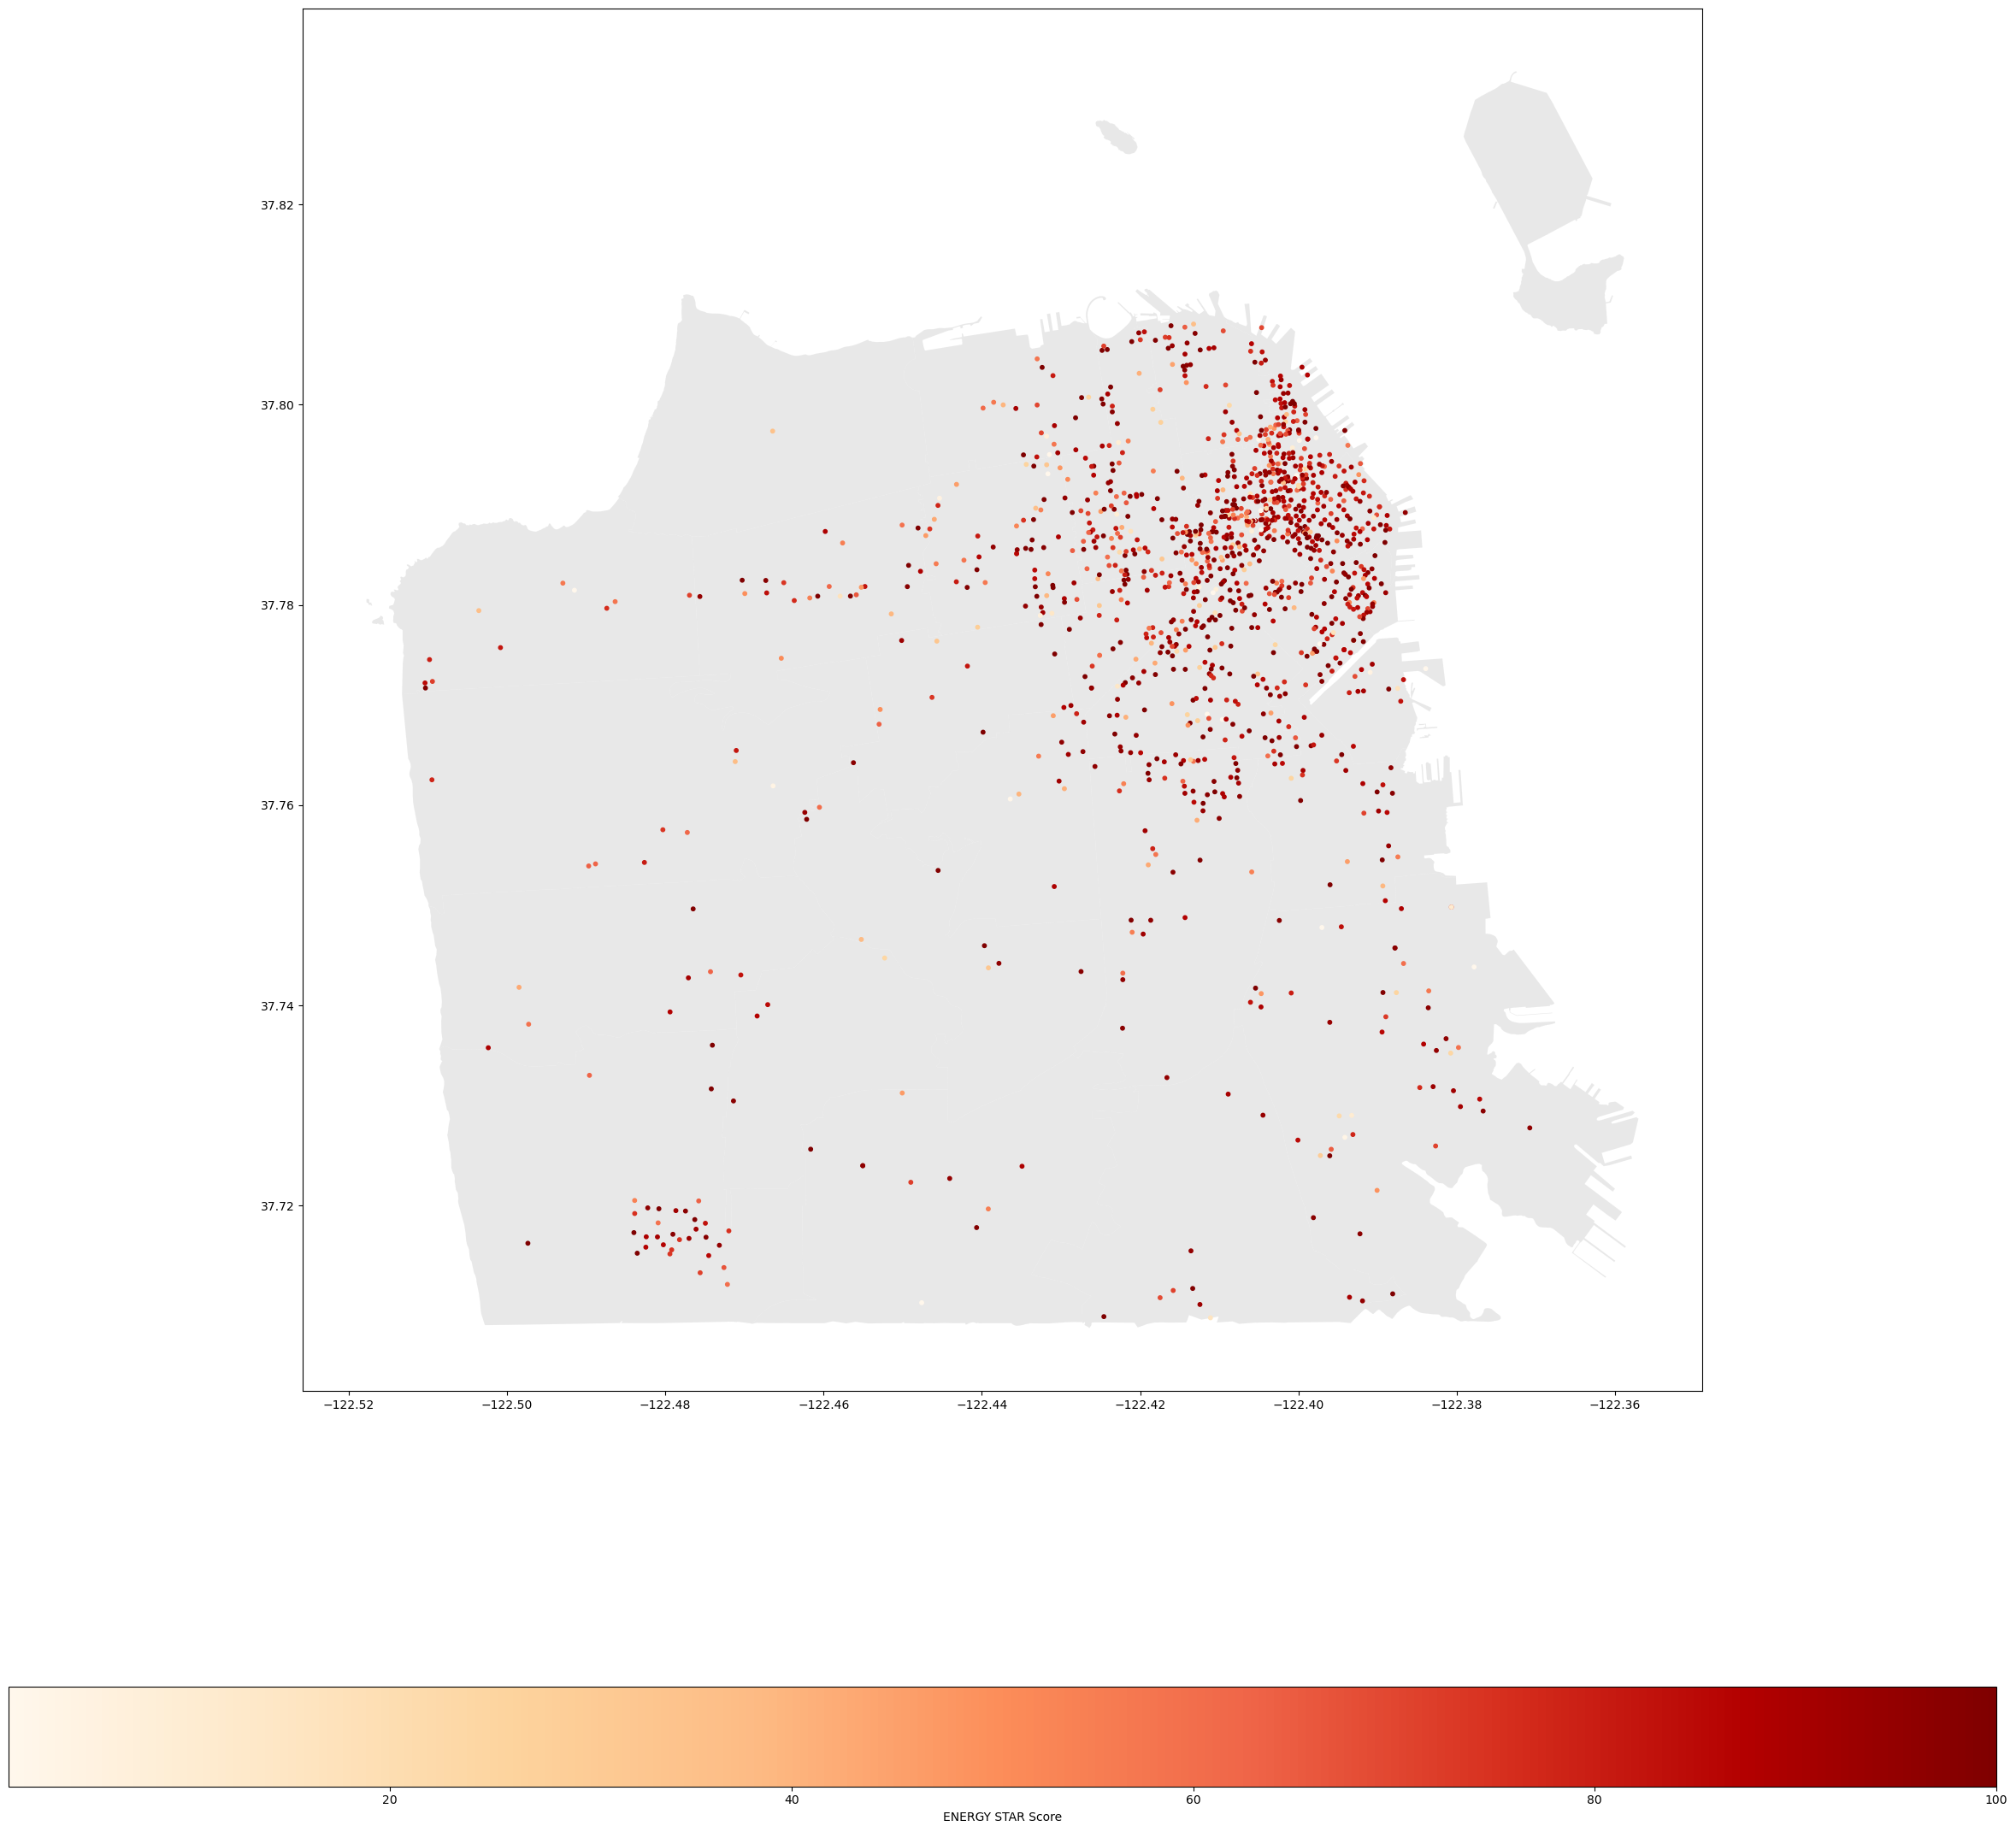

In [9]:
gdf = gpd.read_file('/Users/myeong-won/Desktop/Final Project/2. Peer/San Francisco ZIP Codes.geojson')


fig, ax = plt.subplots(figsize=(30, 30))

gdf.plot(ax=ax, color='lightgrey', alpha=0.5)

points = ax.scatter(buildings_2022['longitude'], buildings_2022['latitude'],
                    c=buildings_2022['ENERGY STAR Score'], s=10,
                    cmap='OrRd', label='ENERGY STAR Score')

plt.colorbar(points, ax=ax, orientation='horizontal', label='ENERGY STAR Score')

plt.show()

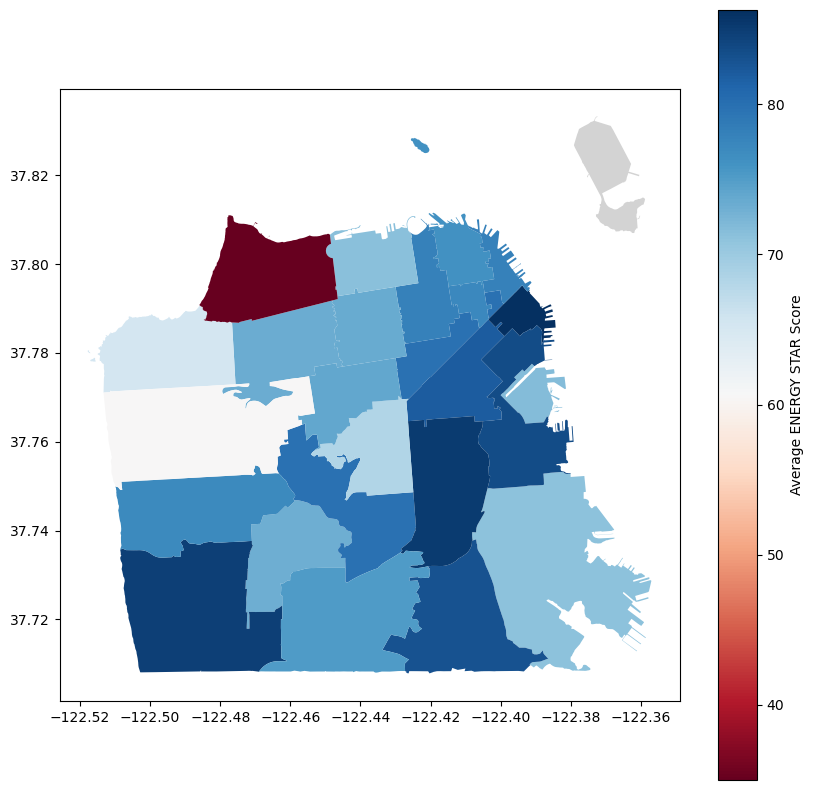

In [10]:
average_scores = buildings_2022.groupby('Postal Code')['ENERGY STAR Score'].mean().reset_index()


average_scores['Postal Code'] = average_scores['Postal Code'].astype(str)
gdf['zip'] = gdf['zip'].astype(str)


gdf_with_scores = gdf.merge(average_scores, left_on='zip', right_on='Postal Code', how='left')


fig, ax = plt.subplots(figsize=(10, 10))
gdf_with_scores.plot(ax=ax, column='ENERGY STAR Score', legend=True,
                     legend_kwds={'label': "Average ENERGY STAR Score", 'orientation': "vertical"},
                     cmap='RdBu', missing_kwds={"color": "lightgrey"})

plt.show()

In [11]:
selection = alt.selection_single(fields=['Postal Code'], on='click', empty='none')

def create_energymap_plot(buildings_data, gdf):
    gdf_with_scores = gdf.merge(buildings_data, left_on='zip', right_on='Postal Code', how='left')
    json_data = json.loads(gdf_with_scores.to_json())
    features = json_data['features']
    selection = alt.selection_single(fields=['Postal Code'], on='click', clear=False)
    energymap = alt.Chart(alt.Data(values=features)).mark_geoshape(
        stroke='black'
    ).encode(
        color=alt.Color('properties.ENERGY STAR Score:Q', scale=alt.Scale(scheme='redblue'), legend=alt.Legend(title=None)),
        tooltip=[alt.Tooltip('properties.zip:N', title='ZIP Code'), alt.Tooltip('properties.ENERGY STAR Score:Q', title='ENERGY STAR Score', format='.0f')]
    ).add_selection(
        selection
    ).properties(
        title='Average ENERGY STAR Score per Zip Code',
        width=800,
        height=800
    ).project(
        type='mercator'
    )

    return energymap

energymap_plot = create_energymap_plot(average_scores, gdf)
energymap_plot.display()


/Users/myeong-won/anaconda3/lib/python3.10/site-packages/altair/utils/deprecation.py:65: AltairDeprecationWarning: 'selection_single' is deprecated.  Use 'selection_point'
  warnings.warn(message, AltairDeprecationWarning, stacklevel=1)
/Users/myeong-won/anaconda3/lib/python3.10/site-packages/altair/vegalite/v5/api.py:398: AltairDeprecationWarning: The value of 'empty' should be True or False.
  warnings.warn(
/Users/myeong-won/anaconda3/lib/python3.10/site-packages/altair/utils/deprecation.py:65: AltairDeprecationWarning: 'selection_single' is deprecated.  Use 'selection_point'
  warnings.warn(message, AltairDeprecationWarning, stacklevel=1)
/Users/myeong-won/anaconda3/lib/python3.10/site-packages/altair/utils/deprecation.py:65: AltairDeprecationWarning: 'add_selection' is deprecated. Use 'add_params' instead.
  warnings.warn(message, AltairDeprecationWarning, stacklevel=1)


alt.Chart(...)

In [12]:
buildings_2022['Property Type - Self Selected'].unique()

array(['Mixed Residential', 'Commercial', 'Multifamily',
       'Commercial - Port Facility'], dtype=object)

In [13]:
buildings_2022['Postal Code'] = buildings_2022['Postal Code'].astype(str)
average_scores['Postal Code'] = average_scores['Postal Code'].astype(str)

buildings_with_scores = buildings_2022.merge(average_scores, on='Postal Code', how='left')

/var/folders/fv/1zrncq9n1js91xjf7fz1dlp40000gn/T/ipykernel_36862/4267763342.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  buildings_2022['Postal Code'] = buildings_2022['Postal Code'].astype(str)


In [14]:
def create_average_score_bar_chart(buildings_with_scores):

    average_scores_by_type = buildings_with_scores.groupby('Property Type - Self Selected')['ENERGY STAR Score_y'].mean().reset_index()

    bar_chart = alt.Chart(average_scores_by_type).mark_bar().encode(
        x=alt.X('Property Type - Self Selected:N', axis=alt.Axis(title='Property Type', labelAngle=-360)),
        y=alt.Y('ENERGY STAR Score_y:Q',
                axis=alt.Axis(title='Average ENERGY STAR Score'),
                scale=alt.Scale(domain=(0, 100))),
        color='Property Type - Self Selected:N',
        tooltip=['Property Type - Self Selected:N', alt.Tooltip('ENERGY STAR Score_y:Q', title='Average Score', format='.0f')]
    ).properties(
        title='Average ENERGY STAR Score by Property Type',
        width=400
    )

    return bar_chart


bar_chart = create_average_score_bar_chart(buildings_with_scores)
bar_chart.display()

alt.Chart(...)

In [15]:
average_scores_by_postal_and_type = buildings_2022.groupby(['Postal Code', 'Property Type - Self Selected'])['ENERGY STAR Score'].mean().reset_index()

average_scores_by_postal_and_type.rename(columns={'Property Type - Self Selected': 'Property Type',
                                                  'ENERGY STAR Score': 'Average Score'}, inplace=True)

average_scores_by_postal_and_type

,Postal Code,Property Type,Average Score
0,94102,Commercial,79.849057
1,94102,Mixed Residential,78.981481
2,94102,Multifamily,84.666667
3,94103,Commercial,81.181034
4,94103,Mixed Residential,81.217391
...,...,...,...
67,94134,Multifamily,70.000000
68,94158,Commercial,84.500000
69,94158,Commercial - Port Facility,1.000000
70,94158,Mixed Residential,86.000000


In [16]:
average_scores_by_postal_and_type = buildings_2022.groupby(['Postal Code', 'Property Type - Self Selected'])['ENERGY STAR Score'].mean().reset_index()
average_scores_by_postal_and_type.rename(columns={'Property Type - Self Selected': 'Property Type',
                                                  'ENERGY STAR Score': 'Average Score'}, inplace=True)

average_scores = buildings_2022.groupby('Postal Code')['ENERGY STAR Score'].mean().reset_index()

final_average_scores = average_scores.merge(average_scores_by_postal_and_type, on='Postal Code', how='left')

final_average_scores

,Postal Code,ENERGY STAR Score,Property Type,Average Score
0,94102,79.818966,Commercial,79.849057
1,94102,79.818966,Mixed Residential,78.981481
2,94102,79.818966,Multifamily,84.666667
3,94103,81.981013,Commercial,81.181034
4,94103,81.981013,Mixed Residential,81.217391
...,...,...,...,...
67,94134,82.909091,Multifamily,70.000000
68,94158,71.714286,Commercial,84.500000
69,94158,71.714286,Commercial - Port Facility,1.000000
70,94158,71.714286,Mixed Residential,86.000000


In [17]:
def plot_average_score_by_property_type(postal_code):

    data = final_average_scores[final_average_scores['Postal Code'] == postal_code]
    fig, ax = plt.subplots(figsize=(10, 6))
    data.plot(kind='bar', x='Property Type', y='Average Score', ax=ax, legend=False)


    plt.title(f'Average Score per Property Type for Postal Code {postal_code}')
    plt.xlabel('Property Type')
    plt.ylabel('Average Score')
    plt.xticks(rotation=45)
    plt.tight_layout()
    plt.show()

postal_code_dropdown = widgets.Dropdown(
    options=final_average_scores['Postal Code'].unique(),
    description='Postal Code:',
)

interact(plot_average_score_by_property_type, postal_code=postal_code_dropdown)

interactive(children=(Dropdown(description='Postal Code:', options=('94102', '94103', '94104', '94105', '94107…

<function __main__.plot_average_score_by_property_type(postal_code)>

In [18]:
def create_energymap_plot(buildings_data, gdf):
    json_data = json.loads(gdf_with_scores.to_json())
    features = json_data['features']

    energymap = alt.Chart(alt.Data(values=features)).mark_geoshape(
        stroke='black'
    ).encode(
        color=alt.Color('properties.ENERGY STAR Score:Q', scale=alt.Scale(scheme='redblue')),
        tooltip=[alt.Tooltip('properties.Postal Code:N', title='Postal Code'),
                 alt.Tooltip('properties.ENERGY STAR Score:Q', title='ENERGY STAR Score', format='.0f')]
    ).add_selection(
        selection
    ).properties(
        title='Average ENERGY STAR Score per Zip Code',
        width=500,
        height=400
    ).project(
        type='mercator'
    )

    return energymap

def plot_average_score_by_property_type(postal_code):

    data = final_average_scores[final_average_scores['Postal Code'] == postal_code]
    fig, ax = plt.subplots(figsize=(5, 4))
    data.plot(kind='bar', x='Property Type', y='Average Score', ax=ax, legend=False)

    plt.title(f'Average Score per Property Type for Postal Code {postal_code}')
    plt.xlabel('Property Type')
    plt.ylabel('Average Score')
    plt.xticks(rotation=-360)
    plt.tight_layout()
    plt.show()

postal_code_dropdown = widgets.Dropdown(
    options=final_average_scores['Postal Code'].unique(),
    description='Postal Code:',
)



energymap_plot = create_energymap_plot(final_average_scores, gdf)
energymap_plot.display()

interact(plot_average_score_by_property_type, postal_code=postal_code_dropdown)

/Users/myeong-won/anaconda3/lib/python3.10/site-packages/altair/utils/deprecation.py:65: AltairDeprecationWarning: 'add_selection' is deprecated. Use 'add_params' instead.
  warnings.warn(message, AltairDeprecationWarning, stacklevel=1)


alt.Chart(...)

interactive(children=(Dropdown(description='Postal Code:', options=('94102', '94103', '94104', '94105', '94107…

<function __main__.plot_average_score_by_property_type(postal_code)>

In [19]:
colormap = plt.cm.get_cmap('tab20')

def plot_average_score_by_property_type(postal_code):
    data = final_average_scores[final_average_scores['Postal Code'] == postal_code]
    fig, ax = plt.subplots(figsize=(5, 4))

    num_bars = len(data)
    colors = [colormap(i % num_bars) for i in range(num_bars)]
    bars = ax.bar(data['Property Type'], data['Average Score'], color=colors)

    plt.title(f'Average Score per Property Type for Postal Code {postal_code}')
    plt.xlabel('Property Type')
    plt.ylabel('Average Score')
    plt.xticks(rotation=45)
    plt.tight_layout()

    plt.show()

postal_code_dropdown = widgets.Dropdown(
    options=final_average_scores['Postal Code'].unique(),
    description='Postal Code:',
)

energymap_plot = create_energymap_plot(final_average_scores, gdf)
energymap_plot.display()

interact(plot_average_score_by_property_type, postal_code=postal_code_dropdown)


/var/folders/fv/1zrncq9n1js91xjf7fz1dlp40000gn/T/ipykernel_36862/4179474769.py:1: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  colormap = plt.cm.get_cmap('tab20')
/Users/myeong-won/anaconda3/lib/python3.10/site-packages/altair/utils/deprecation.py:65: AltairDeprecationWarning: 'add_selection' is deprecated. Use 'add_params' instead.
  warnings.warn(message, AltairDeprecationWarning, stacklevel=1)


alt.Chart(...)

interactive(children=(Dropdown(description='Postal Code:', options=('94102', '94103', '94104', '94105', '94107…

<function __main__.plot_average_score_by_property_type(postal_code)>

### 1. Introduction
Environmentally friendly building operation is a crucial consideration in modern urban development. Efforts to enhance the energy efficiency of buildings are ongoing worldwide, recognized as an essential requirement for sustainable urban development. In this project, I utilize the Energy Star Score based on the Postal Codes in the San Francisco area to conduct a multidimensional analysis and visualization of building types and energy usage trends.


### 2. Project Objectives
The objective of this project is to evaluate the energy efficiency of buildings in different areas based on the Energy Star Score derived from the Postal Codes in San Francisco. I aim to create foundational data visualizations for peer groups, enabling a comparison and analysis of energy efficiency among specific building types.


### 3. Data Collection and Processing

#### 3.1 Data Source 
To collect information related to building energy usage, I explored various data-based sites. Among them, I found the Existing Buildings Energy Performance Ordinance Report on Data.gov. The site's address is as follows:
https://catalog.data.gov/dataset/existing-buildings-energy-performance-ordinance-report-08392 

As the Energy Star Score varies annually, I focused on the data for the year 2022, which had the most extensive dataset, ensuring consistency and accuracy.

#### 3.2 Selection of Postal Codes
The choice of Postal Codes is significant as it helps in categorizing regions based on administrative boundaries and reflects building density. I chose to use Postal Codes to segment and visualize San Francisco.


### 4. Visualization Methods

#### 4.1 Map Visualization
To map the data based on the Energy Performance Ordinance Report, I downloaded a GeoJson file from the City of San Francisco site:
https://data.sfgov.org/Geographic-Locations-and-Boundaries/San-Francisco-ZIP-Codes/srq6-hmpi

By mapping the data onto the map, I visualized Energy Star Scores across different Postal Code regions. This allows for a quick overview of the energy efficiency of buildings in each Postal Code area, indicating high and low-efficiency regions through color representation.

#### 4.2 Tooltip & Dropdown Features
Hovering over a specific Postal Code displays a tooltip with information about the Postal Code and the average Energy Star Score for that area. Additionally, using the dropdown feature, users can explore detailed information about building types within a selected Postal Code, including the average scores for each type.


### 5. Results

#### 5.1 Regional Energy Efficiency
The map visualization allows us to observe variations in Energy Star Scores across different Postal Code regions. Analyzing building density and characteristics associated with Postal Codes can provide important indicators for energy demand and supply distribution in each area.

#### 5.2 Energy Efficiency by Building Type
Analyzing the average Energy Star Score based on building types helps in determining whether specific types of buildings exhibit higher energy efficiency. This information can serve as a reference for future energy policy formulation related to various building types.


### 6. Conclusion
Through this Final Peer Project, I have created data visualizations using Energy Star Scores based on Postal Codes in San Francisco. The analysis encompasses regional and building type-specific energy efficiency. I aimed to present information in a language understandable to the peer group while incorporating professional content.

Segmenting the analysis based on Postal Codes contributes to a more accurate understanding of regional characteristics, considering variations even within the same city. The map-based data graph facilitates a quick overview of Energy Star Scores, allowing for the rapid identification of regional differences. Hovering and Tooltip features provide users with easy access to detailed information about specific Postal Codes, aiding in a deeper understanding of the data.

In conclusion, the presented data visualization methods are highly useful for peer groups to compare and analyze building energy usage trends in San Francisco. Therefore, I anticipate that these results will contribute to policy development for sustainable urban development and improvements in building energy efficiency.